# Financial 3 Semester project (Comparing specific ETF's during various Natural Disasters)

## Nick Zesses, Hunter Vainik, Alli Weems, Maneesh Malpeddi

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import random
import time
import sklearn as skl
import matplotlib.dates as mdates
import datetime as dt

In [ ]:
#Real Estate ETF
iyr = pd.read_csv('Real Estate/IYR.csv', delimiter = ',')
schh = pd.read_csv('Real Estate/SCHH.csv',delimiter = ',')
vnq =  pd.read_csv('Real Estate/VNQ.csv', delimiter = ',')

#Energy Etfs
oilu = pd.read_csv('Energy/OILU.csv',delimiter = ',')
gush = pd.read_csv('Energy/GUSH.csv',delimiter = ',')
vde = pd.read_csv('Energy/VDE.csv',delimiter = ',')

#materials ETF's
iym = pd.read_csv('Materials/IYM.csv',delimiter = ',')
vaw = pd.read_csv('Materials/VAW.csv',delimiter = ',')
xlb = pd.read_csv('Materials/XLB.csv',delimiter = ',')
mxi = pd.read_csv('Materials/MXI.csv', delimiter = ',')

# Entertainment ETFs
pbs = pd.read_csv('Entertainment/PBS.csv',delimiter = ',')
pej = pd.read_csv('Entertainment/PEJ.csv',delimiter = ',')
vox = pd.read_csv('Entertainment/VOX.csv',delimiter = ',')

# Healthcare ETFs
ibb = pd.read_csv('Healthcare/IBB.csv',delimiter = ',')
vht = pd.read_csv('Healthcare/VHT.csv',delimiter = ',')
xlv = pd.read_csv('Healthcare/XLV.csv',delimiter = ',')

# Manufacturing ETFs
exi = pd.read_csv('Manufacturing/EXI (9-28-2006).csv', delimiter = ',') 
vis = pd.read_csv('Manufacturing/VIS (9-30-2004).csv', delimiter = ',') 
xli = pd.read_csv('Manufacturing/XLI (12-28-1998).csv', delimiter = ',')

# Mining ETFs
pick = pd.read_csv('Mining/PICK.csv', delimiter = ',') 
remx = pd.read_csv('Mining/REMX.csv', delimiter = ',')
xme = pd.read_csv('Mining/XME.csv', delimiter = ',')

# Pharma ETFs
ihe = pd.read_csv('Pharma/IHE.csv', delimiter = ',')
pjp = pd.read_csv('Pharma/PJP.csv', delimiter = ',')
pph = pd.read_csv('Pharma/PPH.csv', delimiter = ',')

# Tech ETFs
ryt = pd.read_csv('Tech/RYT.csv', delimiter = ',')
vgt = pd.read_csv('Tech/VGT.csv', delimiter = ',')
xsw = pd.read_csv('Tech/XSW.csv', delimiter = ',')

# Agriculture ETFs
dba = pd.read_csv('Agriculture/DBA.csv', delimiter = ',')
rja = pd.read_csv('Agriculture/RJA.csv', delimiter = ',')
tags = pd.read_csv('Agriculture/TAGS.csv', delimiter = ',')

# Automotive ETFs
carz = pd.read_csv('Automotive/CARZ.csv', delimiter = ',')
driv = pd.read_csv('Automotive/DRIV.csv', delimiter = ',')
vcar = pd.read_csv('Automotive/VCAR.csv', delimiter = ',')

# Telocommunications ETFs
iyz = pd.read_csv('Telecommunications/IYZ.csv', delimiter = ',')
nxtg = pd.read_csv('Telecommunications/NXTG.csv', delimiter = ',')
vox = pd.read_csv('Telecommunications/VOX.csv', delimiter = ',')

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import random
import time
import sklearn as skl
import matplotlib.dates as mdates
import datetime as dt

class dis:
    """ Disasters class.

    Attributes
    ----------
    date: industry affected
        
    natural_disaster: str
        type of disaster

    Methods
    -------
    info():
        Prints disaster info.

    check_etf:
        checks disaster impact on ETF

    """
    dates = None
    natural_disaster = None
    etf = None
    industry = None
    
    
    def __init__(self, industry_name, natural_disaster_type):
        self.industry_name = industry_name
        self.natural_disaster_type = natural_disaster_type
        
        """Read in ETF'S.

        Data from Yahoo Finance
        ----------
        list_etfs: Pathspace to data in list form
            
        data: assign each to proper ETF name
        
        natural_dis: Data from natural disasters masked to be different types

        """
        list_etfs = ['Pharma/IHE.csv', 'Pharma/PJP.csv', 'Pharma/PPH.csv', 
             'Real Estate/IYR.csv', 'Real Estate/SCHH.csv', 'Real Estate/VNQ.csv',
             'Energy/OILU.csv', 'Energy/GUSH.csv', 'Energy/VDE.csv',
             'Materials/IYM.csv', 'Materials/VAW.csv', 'Materials/XLB.csv', 'Materials/MXI.csv',
             'Entertainment/PBS.csv', 'Entertainment/PEJ.csv', 'Entertainment/VOX.csv',
             'Healthcare/IBB.csv', 'Healthcare/VHT.csv', 'Healthcare/XLV.csv',
             'Manufacturing/EXI (9-28-2006).csv', 'Manufacturing/VIS (9-30-2004).csv', 'Manufacturing/XLI (12-28-1998).csv',
             'Mining/PICK.csv', 'Mining/REMX.csv','Mining/XME.csv',
             'Tech/RYT.csv', 'Tech/VGT.csv', 'Tech/XSW.csv',
             'Agriculture/DBA.csv', 'Agriculture/RJA.csv', 'Agriculture/TAGS.csv',
             'Automotive/CARZ.csv', 'Automotive/DRIV.csv', 'Automotive/VCAR.csv',
             'Telecommunications/IYZ.csv', 'Telecommunications/NXTG.csv', 'Telecommunications/VOX.csv']
        
        data = []

        for file in list_etfs:
            df = pd.read_csv(file, delimiter = ',')
            data.append(df)
    
        IHE, PJP, PPH, IYR, SCHH, VNQ, OILU, GUSH, VDE, IYM, VAW, XLB, MXI, PBS, PEJ, VOX, IBB, VHT, XLV, EXI, VIS, XLI, PICK, REMX, XME, RYT, VGT, XSW, DBA, RJA, TAGS,CARZ, DRIV, VCAR, IYZ, NXTG, VOX = data

        self.pharma = [IHE, PJP, PPH]
        self.real_estate = [IYR, SCHH, VNQ]
        self.energy = [OILU, GUSH, VDE]
        self.materials = [IYM, VAW, XLB, MXI]
        self.entertainment = [PBS, PEJ, VOX]
        self.healthcare = [IBB, VHT, XLV]
        self.manufacturing = [EXI, VIS, XLI]
        self.mining = [PICK, REMX, XME]
        self.tech = [RYT, VGT, XSW]
        self.agriculture = [DBA, RJA, TAGS]
        self.automotive = [CARZ, DRIV, VCAR]
        self.telecommunications = [IYZ, NXTG, VOX]
        
        pharma = [IHE, PJP, PPH]
        real_estate = [IYR, SCHH, VNQ]
        energy = [OILU, GUSH, VDE]
        materials = [IYM, VAW, XLB, MXI]
        entertainment = [PBS, PEJ, VOX]
        healthcare = [IBB, VHT, XLV]
        manufacturing = [EXI, VIS, XLI]
        mining = [PICK, REMX, XME]
        tech = [RYT, VGT, XSW]
        agriculture = [DBA, RJA, TAGS]
        automotive = [CARZ, DRIV, VCAR]
        telecommunications = [IYZ, NXTG, VOX]
        
        natural_dis = pd.read_csv('Disaster List.csv')

        self.tornado = natural_dis[natural_dis['Disaster Type']=='Tornado']
        self.snowstorm = natural_dis[natural_dis['Disaster Type']=='Snowstorm']
        self.hurricane = natural_dis[natural_dis['Disaster Type']=='Hurricane']
    
    
    def data(self):

        if self.industry_name == 'Pharmaceutical':
            self.industry = pharma
            self.etf = ['IHE', 'PJP', 'PPH']
        elif self.industry_name == 'Real Estate':
            self.industry = self.real_estate
            self.etf = ['IYR', 'SCHH', 'VNQ']
        elif self.industry_name == 'Energy':
            self.industry = self.energy
            self.etf = ['OILU', 'GUSH', 'VDE']
        elif self.industry_name == 'Materials':
            self.industry = self.materials
            self.etf = ['IYM', 'VAW', 'XLB', 'MXI']
        elif self.industry_name == 'Entertainment':
            self.industry = self.entertainment
            self.etf = ['PBS', 'PEJ', 'VOX']
        elif self.industry_name == 'Healthcare':
            self.industry = self.healthcare
            self.etf = ['IBB', 'VHT', 'XLV']
        elif self.industry_name == 'Manufacturing':
            self.industry = self.manufacturing
            self.etf = ['EXI', 'VIS', 'XLI']
        elif self.industry_name == 'Mining':
            self.industry = self.mining
            self.etf = ['PICK', 'REMX', 'XME']
        elif self.industry_name == 'Tech':
            self.industry = self.tech
            self.etf = ['RYT', 'VGT', 'XSW']
        elif self.industry_name == 'Agriculture':
            self.industry = self.agriculture
            self.etf = ['DBA', 'RJA', 'TAGS']
        elif self.industry_name == 'Automotive':
            self.industry = self.automotive
            self.etf = ['CARZ', 'DRIV', 'VCAR']
        elif self.industry_name == 'Telecommunications':
            self.industry = self.telecommunications
            self.etf = ['IYZ', 'NXTG', 'VOX']
        
        #self.dates = dates
        if self.natural_disaster_type == 'Tornado':
            self.natural_disaster = self.tornado
            self.dates = self.natural_disaster['Start']
        elif self.natural_disaster_type == 'Hurricane':
            self.natural_disaster = self.hurricane
            self.dates = self.natural_disaster['Start']
        elif self.natural_disaster_type == 'Snowstorm':
            self.natural_disaster = self.snowstorm
            self.dates = self.natural_disaster['Start']
        
    def plot(self):
        axv = []
        for dis in self.dates:
            axv.append([dt.datetime.strptime(d,'%Y-%m-%d').date() for d in self.dates.iloc[:]])
        
        axv0 = axv[0]
        
        if self.natural_disaster_type == 'Tornado':
            for etf in self.industry:
                x = [dt.datetime.strptime(d,'%Y-%m-%d').date() for d in etf.iloc[:,0]]
                plt.plot(x, etf['Open'], label = self.etf)
                plt.xlabel('Date')
                plt.ylabel('Stock Open')
                plt.title(f"{self.industry_name} plotted during {self.natural_disaster_type}")
            #legend = (self.etf[0], self.etf[1], self.etf[2])
                #plt.legend()
                plt.axvline(axv0[20], c = 'black')
                plt.axvline(axv0[5], c = 'black')
                plt.axvline(axv0[10], c = 'black')
                plt.axvline(axv0[4], c= 'black')
                plt.axvline(axv0[14], c='black')
                
        if self.natural_disaster_type == 'Hurricane':
            for etf in self.industry:
                x = [dt.datetime.strptime(d,'%Y-%m-%d').date() for d in etf.iloc[:,0]]
                plt.plot(x, etf['Open'], label = self.etf)
                plt.xlabel('Date')
                plt.ylabel('Stock Open')
                plt.title(f"{self.industry_name} plotted during {self.natural_disaster_type}")
                plt.axvline(axv0[20])
                plt.axvline(axv0[5])
                plt.axvline(axv0[10])
                plt.axvline(axv0[2])
                plt.axvline(axv0[14])

In [12]:
tornadoes = dis('Agriculture', 'Tornado')
tornadoes.data()

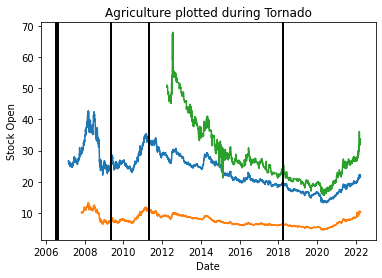

In [13]:
tornadoes.plot()

In [21]:
class disasters:
    """ Disasters class.

    Attributes
    ----------
    industry name: str
        industry to be plotted
        
    natural_disaster: str
        type of disaster

    Methods
    -------
    data():
        Sets data .

    plot:
        Plots industry with various natural disasters of specified type

    """
    dates = None
    natural_disaster = None
    etf = None
    industry = None
    
    
    def __init__(self, industry_name, natural_disaster_type):
        self.industry_name = industry_name
        self.natural_disaster_type = natural_disaster_type
        
        """Read in ETF'S.

        Data from Yahoo Finance
        ----------
        list_etfs: Pathspace to data in list form
            
        data: assign each to proper ETF name
        
        natural_dis: Data from natural disasters masked to be different types

        """
        list_etfs = ['Pharma/IHE.csv', 'Pharma/PJP.csv', 'Pharma/PPH.csv', 
             'Real Estate/IYR.csv', 'Real Estate/SCHH.csv', 'Real Estate/VNQ.csv',
             'Energy/OILU.csv', 'Energy/GUSH.csv', 'Energy/VDE.csv',
             'Materials/IYM.csv', 'Materials/VAW.csv', 'Materials/XLB.csv', 'Materials/MXI.csv',
             'Entertainment/PBS.csv', 'Entertainment/PEJ.csv', 'Entertainment/VOX.csv',
             'Healthcare/IBB.csv', 'Healthcare/VHT.csv', 'Healthcare/XLV.csv',
             'Manufacturing/EXI (9-28-2006).csv', 'Manufacturing/VIS (9-30-2004).csv', 'Manufacturing/XLI (12-28-1998).csv',
             'Mining/PICK.csv', 'Mining/REMX.csv','Mining/XME.csv',
             'Tech/RYT.csv', 'Tech/VGT.csv', 'Tech/XSW.csv',
             'Agriculture/DBA.csv', 'Agriculture/RJA.csv', 'Agriculture/TAGS.csv',
             'Automotive/CARZ.csv', 'Automotive/DRIV.csv', 'Automotive/VCAR.csv',
             'Telecommunications/IYZ.csv', 'Telecommunications/NXTG.csv', 'Telecommunications/VOX.csv']
        
        data = []

        for file in list_etfs:
            df = pd.read_csv(file, delimiter = ',')
            data.append(df)
    
        IHE, PJP, PPH, IYR, SCHH, VNQ, OILU, GUSH, VDE, IYM, VAW, XLB, MXI, PBS, PEJ, VOX, IBB, VHT, XLV, EXI, VIS, XLI, PICK, REMX, XME, RYT, VGT, XSW, DBA, RJA, TAGS,CARZ, DRIV, VCAR, IYZ, NXTG, VOX = data
        
        #create sectors with corresponding ETF's
        self.pharma = [IHE, PJP, PPH]
        self.real_estate = [IYR, SCHH, VNQ]
        self.energy = [OILU, GUSH, VDE]
        self.materials = [IYM, VAW, XLB, MXI]
        self.entertainment = [PBS, PEJ, VOX]
        self.healthcare = [IBB, VHT, XLV]
        self.manufacturing = [EXI, VIS, XLI]
        self.mining = [PICK, REMX, XME]
        self.tech = [RYT, VGT, XSW]
        self.agriculture = [DBA, RJA, TAGS]
        self.automotive = [CARZ, DRIV, VCAR]
        self.telecommunications = [IYZ, NXTG, VOX]
        
        pharma = [IHE, PJP, PPH]
        real_estate = [IYR, SCHH, VNQ]
        energy = [OILU, GUSH, VDE]
        materials = [IYM, VAW, XLB, MXI]
        entertainment = [PBS, PEJ, VOX]
        healthcare = [IBB, VHT, XLV]
        manufacturing = [EXI, VIS, XLI]
        mining = [PICK, REMX, XME]
        tech = [RYT, VGT, XSW]
        agriculture = [DBA, RJA, TAGS]
        automotive = [CARZ, DRIV, VCAR]
        telecommunications = [IYZ, NXTG, VOX]
        
        #read in natural disaster master list
        natural_dis = pd.read_csv('Disaster List.csv')

        #mask data to have tornados, snowstorms, and hurricanes separate
        tornado = natural_dis[natural_dis['Disaster Type']=='Tornado']
        snowstorm = natural_dis[natural_dis['Disaster Type']=='Snowstorm']
        hurricane = natural_dis[natural_dis['Disaster Type']=='Hurricane']
    
    
    def data(self):

        if self.industry_name == 'Pharmaceutical':
            self.industry = self.pharma
            self.etf = ['IHE', 'PJP', 'PPH']
        elif self.industry_name == 'Real Estate':
            self.industry = self.real_estate
            self.etf = ['IYR', 'SCHH', 'VNQ']
        elif self.industry_name == 'Energy':
            self.industry = self.energy
            self.etf = ['OILU', 'GUSH', 'VDE']
        elif self.industry_name == 'Materials':
            self.industry = self.materials
            self.etf = ['IYM', 'VAW', 'XLB', 'MXI']
        elif self.industry_name == 'Entertainment':
            self.industry = self.entertainment
            self.etf = ['PBS', 'PEJ', 'VOX']
        elif self.industry_name == 'Healthcare':
            self.industry = self.healthcare
            self.etf = ['IBB', 'VHT', 'XLV']
        elif self.industry_name == 'Manufacturing':
            self.industry = self.manufacturing
            self.etf = ['EXI', 'VIS', 'XLI']
        elif self.industry_name == 'Mining':
            self.industry = self.mining
            self.etf = ['PICK', 'REMX', 'XME']
        elif self.industry_name == 'Tech':
            self.industry = self.tech
            self.etf = ['RYT', 'VGT', 'XSW']
        elif self.industry_name == 'Agriculture':
            self.industry = self.agriculture
            self.etf = ['DBA', 'RJA', 'TAGS']
        elif self.industry_name == 'Automotive':
            self.industry = self.automotive
            self.etf = ['CARZ', 'DRIV', 'VCAR']
        elif self.industry_name == 'Telecommunications':
            self.industry = self.telecommunications
            self.etf = ['IYZ', 'NXTG', 'VOX']
        
        #self.dates = dates
        if self.natural_disaster_type == 'Tornado':
            self.natural_disaster = tornado
            self.dates = self.natural_disaster['Start']
        elif self.natural_disaster_type == 'Hurricane':
            self.natural_disaster = hurricane
            self.dates = self.natural_disaster['Start']
        elif self.natural_disaster_type == 'Snowstorm':
            self.natural_disaster = snowstorm
            self.dates = self.natural_disaster['Start']
        
    def plot(self):
        axv = []
        for dis in self.dates:
            axv.append([dt.datetime.strptime(d,'%Y-%m-%d').date() for d in self.dates.iloc[:]])
        
        axv0 = axv[0]
        
        if self.natural_disaster_type == 'Tornado':
            for etf in self.industry:
                x = [dt.datetime.strptime(d,'%Y-%m-%d').date() for d in etf.iloc[:,0]]
                plt.plot(x, etf['Open'], label = self.etf[etf])
                plt.xlabel('Date')
                plt.ylabel('Stock Open')
                plt.title(f"{self.industry_name} plotted during {self.natural_disaster_type}")
                plt.legend()
                plt.axvline(axv0[20])
                plt.axvline(axv0[5])
                plt.axvline(axv0[10])
                plt.axvline(axv0[4])
                plt.axvline(axv0[14])
                
        if self.natural_disaster_type == 'Hurricane':
            for etf in self.industry:
                x = [dt.datetime.strptime(d,'%Y-%m-%d').date() for d in etf.iloc[:,0]]
                plt.plot(x, etf['Open'], label = self.etf)
                plt.xlabel('Date')
                plt.ylabel('Stock Open')
                plt.title(f"{self.industry_name} plotted during {self.natural_disaster_type}")
                plt.axvline(axv0[20], c='black')
                plt.axvline(axv0[8], c='black')
                plt.axvline(axv0[12], c='black')
                plt.axvline(axv0[2], c='black')
                plt.axvline(axv0[14], c='black')
             
        if self.natural_disaster_type == 'Snowstorm':
            for etf in self.industry:
                x = [dt.datetime.strptime(d,'%Y-%m-%d').date() for d in etf.iloc[:,0]]
                plt.plot(x, etf['Open'], label = self.etf)
                plt.xlabel('Date')
                plt.ylabel('Stock Open')
                plt.title(f"{self.industry_name} plotted during {self.natural_disaster_type}")
                plt.axvline(axv0[20], c='black')
                plt.axvline(axv0[5], c='black')
                plt.axvline(axv0[10], c='black')
                plt.axvline(axv0[2], c='black')
                plt.axvline(axv0[40], c='black')
            

In [22]:
hurricanes = disasters('Real Estate', 'Hurricane')
hurricanes.data()

NameError: name 'hurricane' is not defined

In [23]:
hurricanes.plot()

TypeError: 'NoneType' object is not iterable

In [25]:
class disasters:
    """ Disasters class.

    Attributes
    ----------
    industry name: str
        industry to be plotted
        
    natural_disaster: str
        type of disaster

    Methods
    -------
    data():
        Sets data .

    plot:
        Plots industry with various natural disasters of specified type

    """
    dates = None
    natural_disaster = None
    etf = None
    industry = None
    
    
    def __init__(self, industry_name, natural_disaster_type):
        self.industry_name = industry_name
        self.natural_disaster_type = natural_disaster_type
        
        """Read in ETF'S.

        Data from Yahoo Finance
        ----------
        list_etfs: Pathspace to data in list form
            
        data: assign each to proper ETF name
        
        natural_dis: Data from natural disasters masked to be different types

        """
        list_etfs = ['Pharma/IHE.csv', 'Pharma/PJP.csv', 'Pharma/PPH.csv', 
             'Real Estate/IYR.csv', 'Real Estate/SCHH.csv', 'Real Estate/VNQ.csv',
             'Energy/OILU.csv', 'Energy/GUSH.csv', 'Energy/VDE.csv',
             'Materials/IYM.csv', 'Materials/VAW.csv', 'Materials/XLB.csv', 'Materials/MXI.csv',
             'Entertainment/PBS.csv', 'Entertainment/PEJ.csv', 'Entertainment/VOX.csv',
             'Healthcare/IBB.csv', 'Healthcare/VHT.csv', 'Healthcare/XLV.csv',
             'Manufacturing/EXI (9-28-2006).csv', 'Manufacturing/VIS (9-30-2004).csv', 'Manufacturing/XLI (12-28-1998).csv',
             'Mining/PICK.csv', 'Mining/REMX.csv','Mining/XME.csv',
             'Tech/RYT.csv', 'Tech/VGT.csv', 'Tech/XSW.csv',
             'Agriculture/DBA.csv', 'Agriculture/RJA.csv', 'Agriculture/TAGS.csv',
             'Automotive/CARZ.csv', 'Automotive/DRIV.csv', 'Automotive/VCAR.csv',
             'Telecommunications/IYZ.csv', 'Telecommunications/NXTG.csv', 'Telecommunications/VOX.csv']
        
        data = []

        for file in list_etfs:
            df = pd.read_csv(file, delimiter = ',')
            data.append(df)
    
        IHE, PJP, PPH, IYR, SCHH, VNQ, OILU, GUSH, VDE, IYM, VAW, XLB, MXI, PBS, PEJ, VOX, IBB, VHT, XLV, EXI, VIS, XLI, PICK, REMX, XME, RYT, VGT, XSW, DBA, RJA, TAGS,CARZ, DRIV, VCAR, IYZ, NXTG, VOX = data
        
        #create sectors with corresponding ETF's
        self.pharma = [IHE, PJP, PPH]
        self.real_estate = [IYR, SCHH, VNQ]
        self.energy = [OILU, GUSH, VDE]
        self.materials = [IYM, VAW, XLB, MXI]
        self.entertainment = [PBS, PEJ, VOX]
        self.healthcare = [IBB, VHT, XLV]
        self.manufacturing = [EXI, VIS, XLI]
        self.mining = [PICK, REMX, XME]
        self.tech = [RYT, VGT, XSW]
        self.agriculture = [DBA, RJA, TAGS]
        self.automotive = [CARZ, DRIV, VCAR]
        self.telecommunications = [IYZ, NXTG, VOX]
        
        pharma = [IHE, PJP, PPH]
        real_estate = [IYR, SCHH, VNQ]
        energy = [OILU, GUSH, VDE]
        materials = [IYM, VAW, XLB, MXI]
        entertainment = [PBS, PEJ, VOX]
        healthcare = [IBB, VHT, XLV]
        manufacturing = [EXI, VIS, XLI]
        mining = [PICK, REMX, XME]
        tech = [RYT, VGT, XSW]
        agriculture = [DBA, RJA, TAGS]
        automotive = [CARZ, DRIV, VCAR]
        telecommunications = [IYZ, NXTG, VOX]
        
        #read in natural disaster master list
        natural_dis = pd.read_csv('Disaster List.csv')

        #mask data to have tornados, snowstorms, and hurricanes separate
        tornado = natural_dis[natural_dis['Disaster Type']=='Tornado']
        snowstorm = natural_dis[natural_dis['Disaster Type']=='Snowstorm']
        hurricane = natural_dis[natural_dis['Disaster Type']=='Hurricane']
    
    
    def data(self):

        if self.industry_name == 'Pharmaceutical':
            self.industry = self.pharma
            self.etf = ['IHE', 'PJP', 'PPH']
        elif self.industry_name == 'Real Estate':
            self.industry = self.real_estate
            self.etf = ['IYR', 'SCHH', 'VNQ']
        elif self.industry_name == 'Energy':
            self.industry = self.energy
            self.etf = ['OILU', 'GUSH', 'VDE']
        elif self.industry_name == 'Materials':
            self.industry = self.materials
            self.etf = ['IYM', 'VAW', 'XLB', 'MXI']
        elif self.industry_name == 'Entertainment':
            self.industry = self.entertainment
            self.etf = ['PBS', 'PEJ', 'VOX']
        elif self.industry_name == 'Healthcare':
            self.industry = self.healthcare
            self.etf = ['IBB', 'VHT', 'XLV']
        elif self.industry_name == 'Manufacturing':
            self.industry = self.manufacturing
            self.etf = ['EXI', 'VIS', 'XLI']
        elif self.industry_name == 'Mining':
            self.industry = self.mining
            self.etf = ['PICK', 'REMX', 'XME']
        elif self.industry_name == 'Tech':
            self.industry = self.tech
            self.etf = ['RYT', 'VGT', 'XSW']
        elif self.industry_name == 'Agriculture':
            self.industry = self.agriculture
            self.etf = ['DBA', 'RJA', 'TAGS']
        elif self.industry_name == 'Automotive':
            self.industry = self.automotive
            self.etf = ['CARZ', 'DRIV', 'VCAR']
        elif self.industry_name == 'Telecommunications':
            self.industry = self.telecommunications
            self.etf = ['IYZ', 'NXTG', 'VOX']
        
        #self.dates = dates
        if self.natural_disaster_type == 'Tornado':
            self.natural_disaster = tornado
            self.dates = self.natural_disaster['Start']
        elif self.natural_disaster_type == 'Hurricane':
            self.natural_disaster = hurricane
            self.dates = self.natural_disaster['Start']
        elif self.natural_disaster_type == 'Snowstorm':
            self.natural_disaster = snowstorm
            self.dates = self.natural_disaster['Start']
        
    def plot(self):
        axv = []
        for dis in self.dates:
            axv.append([dt.datetime.strptime(d,'%Y-%m-%d').date() for d in self.dates.iloc[:]])
        
        axv0 = axv[0]
        
        if self.natural_disaster_type == 'Tornado':
            for etf in self.industry:
                x = [dt.datetime.strptime(d,'%Y-%m-%d').date() for d in etf.iloc[:,0]]
                #plt.figure(figsize = (15,9))
                plt.plot(x, etf['Open'], label = self.etf[etf])
                plt.xlabel('Date')
                plt.ylabel('Stock Open')
                plt.title(f"{self.industry_name} plotted during {self.natural_disaster_type}")
                plt.legend()
                plt.axvline(axv0[20])
                plt.axvline(axv0[5])
                plt.axvline(axv0[10])
                plt.axvline(axv0[4])
                plt.axvline(axv0[14])
                
        if self.natural_disaster_type == 'Hurricane':
            #plt.figure(figsize = (12,9))
            for etf in self.industry:
                x = [dt.datetime.strptime(d,'%Y-%m-%d').date() for d in etf.iloc[:,0]]
                plt.plot(x, etf['Open'], label = self.etf)
                plt.xlabel('Date')
                plt.ylabel('Stock Open')
                plt.title(f"{self.industry_name} plotted during {self.natural_disaster_type}")
                #plt.legend()
                plt.axvline(axv0[20], c='black')
                plt.axvline(axv0[8], c='black')
                plt.axvline(axv0[12], c='black')
                plt.axvline(axv0[2], c='black')
                plt.axvline(axv0[14], c='black')
             
        if self.natural_disaster_type == 'Snowstorm':
            #plt.figure(figsize = (15,9))
            for etf in self.industry:
                x = [dt.datetime.strptime(d,'%Y-%m-%d').date() for d in etf.iloc[:,0]]
                #plt.figure(figsize = (15,9))
                plt.plot(x, etf['Open'], label = self.etf)
                plt.xlabel('Date')
                plt.ylabel('Stock Open')
                plt.title(f"{self.industry_name} plotted during {self.natural_disaster_type}")
                #plt.legend()
                plt.axvline(axv0[20], c='black')
                plt.axvline(axv0[5], c='black')
                plt.axvline(axv0[10], c='black')
                plt.axvline(axv0[2], c='black')
                plt.axvline(axv0[40], c='black')
             

In [26]:
hurricanes = disasters('Real Estate', 'Hurricane')
hurricanes.data()

NameError: name 'hurricane' is not defined

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import random
import time
import sklearn as skl
import matplotlib.dates as mdates
import datetime as dt

class tornado_dis:
    """ Disasters class.

    Attributes
    ----------
    date: industry affected
        
    natural_disaster: str
        type of disaster

    Methods
    -------
    info():
        Prints disaster info.

    check_etf:
        checks disaster impact on ETF

    """
    dates = None
    natural_disaster = None
    etf = None
    industry = None
    
    
    def __init__(self, industry_name, natural_disaster_type):
        self.industry_name = industry_name
        self.natural_disaster_type = natural_disaster_type
        
        """Read in ETF'S.

        Data from Yahoo Finance
        ----------
        list_etfs: Pathspace to data in list form
            
        data: assign each to proper ETF name
        
        natural_dis: Data from natural disasters masked to be different types

        """
        list_etfs = ['Pharma/IHE.csv', 'Pharma/PJP.csv', 'Pharma/PPH.csv', 
             'Real Estate/IYR.csv', 'Real Estate/SCHH.csv', 'Real Estate/VNQ.csv',
             'Energy/OILU.csv', 'Energy/GUSH.csv', 'Energy/VDE.csv',
             'Materials/IYM.csv', 'Materials/VAW.csv', 'Materials/XLB.csv', 'Materials/MXI.csv',
             'Entertainment/PBS.csv', 'Entertainment/PEJ.csv', 'Entertainment/VOX.csv',
             'Healthcare/IBB.csv', 'Healthcare/VHT.csv', 'Healthcare/XLV.csv',
             'Manufacturing/EXI (9-28-2006).csv', 'Manufacturing/VIS (9-30-2004).csv', 'Manufacturing/XLI (12-28-1998).csv',
             'Mining/PICK.csv', 'Mining/REMX.csv','Mining/XME.csv',
             'Tech/RYT.csv', 'Tech/VGT.csv', 'Tech/XSW.csv',
             'Agriculture/DBA.csv', 'Agriculture/RJA.csv', 'Agriculture/TAGS.csv',
             'Automotive/CARZ.csv', 'Automotive/DRIV.csv', 'Automotive/VCAR.csv',
             'Telecommunications/IYZ.csv', 'Telecommunications/NXTG.csv', 'Telecommunications/VOX.csv']
        
        data = []

        for file in list_etfs:
            df = pd.read_csv(file, delimiter = ',')
            data.append(df)
    
        IHE, PJP, PPH, IYR, SCHH, VNQ, OILU, GUSH, VDE, IYM, VAW, XLB, MXI, PBS, PEJ, VOX, IBB, VHT, XLV, EXI, VIS, XLI, PICK, REMX, XME, RYT, VGT, XSW, DBA, RJA, TAGS,CARZ, DRIV, VCAR, IYZ, NXTG, VOX = data

        self.pharma = [IHE, PJP, PPH]
        self.real_estate = [IYR, SCHH, VNQ]
        self.energy = [OILU, GUSH, VDE]
        self.materials = [IYM, VAW, XLB, MXI]
        self.entertainment = [PBS, PEJ, VOX]
        self.healthcare = [IBB, VHT, XLV]
        self.manufacturing = [EXI, VIS, XLI]
        self.mining = [PICK, REMX, XME]
        self.tech = [RYT, VGT, XSW]
        self.agriculture = [DBA, RJA, TAGS]
        self.automotive = [CARZ, DRIV, VCAR]
        self.telecommunications = [IYZ, NXTG, VOX]
        
        pharma = [IHE, PJP, PPH]
        real_estate = [IYR, SCHH, VNQ]
        energy = [OILU, GUSH, VDE]
        materials = [IYM, VAW, XLB, MXI]
        entertainment = [PBS, PEJ, VOX]
        healthcare = [IBB, VHT, XLV]
        manufacturing = [EXI, VIS, XLI]
        mining = [PICK, REMX, XME]
        tech = [RYT, VGT, XSW]
        agriculture = [DBA, RJA, TAGS]
        automotive = [CARZ, DRIV, VCAR]
        telecommunications = [IYZ, NXTG, VOX]
        
        natural_dis = pd.read_csv('Disaster List.csv')

        self.tornado = natural_dis[natural_dis['Disaster Type']=='Tornado']
        self.snowstorm = natural_dis[natural_dis['Disaster Type']=='Snowstorm']
        self.hurricane = natural_dis[natural_dis['Disaster Type']=='Hurricane']
    
    
    def data(self):

        if self.industry_name == 'Pharmaceutical':
            self.industry = self.pharma
            self.etf = ['IHE', 'PJP', 'PPH']
        elif self.industry_name == 'Real Estate':
            self.industry = self.real_estate
            self.etf = ['IYR', 'SCHH', 'VNQ']
        elif self.industry_name == 'Energy':
            self.industry = self.energy
            self.etf = ['OILU', 'GUSH', 'VDE']
        elif self.industry_name == 'Materials':
            self.industry = self.materials
            self.etf = ['IYM', 'VAW', 'XLB', 'MXI']
        elif self.industry_name == 'Entertainment':
            self.industry = self.entertainment
            self.etf = ['PBS', 'PEJ', 'VOX']
        elif self.industry_name == 'Healthcare':
            self.industry = self.healthcare
            self.etf = ['IBB', 'VHT', 'XLV']
        elif self.industry_name == 'Manufacturing':
            self.industry = self.manufacturing
            self.etf = ['EXI', 'VIS', 'XLI']
        elif self.industry_name == 'Mining':
            self.industry = self.mining
            self.etf = ['PICK', 'REMX', 'XME']
        elif self.industry_name == 'Tech':
            self.industry = self.tech
            self.etf = ['RYT', 'VGT', 'XSW']
        elif self.industry_name == 'Agriculture':
            self.industry = self.agriculture
            self.etf = ['DBA', 'RJA', 'TAGS']
        elif self.industry_name == 'Automotive':
            self.industry = self.automotive
            self.etf = ['CARZ', 'DRIV', 'VCAR']
        elif self.industry_name == 'Telecommunications':
            self.industry = self.telecommunications
            self.etf = ['IYZ', 'NXTG', 'VOX']
        
        #self.dates = dates
        if self.natural_disaster_type == 'Tornado':
            self.natural_disaster = self.tornado
            self.dates = self.natural_disaster['Start']
        elif self.natural_disaster_type == 'Hurricane':
            self.natural_disaster = self.hurricane
            self.dates = self.natural_disaster['Start']
        elif self.natural_disaster_type == 'Snowstorm':
            self.natural_disaster = self.snowstorm
            self.dates = self.natural_disaster['Start']
        
    def plot(self):
        axv = []
        for dis in self.dates:
            axv.append([dt.datetime.strptime(d,'%Y-%m-%d').date() for d in self.dates.iloc[:]])
        
        axv0 = axv[0]
        
        if self.natural_disaster_type == 'Tornado':
            for etf in self.industry:
                x = [dt.datetime.strptime(d,'%Y-%m-%d').date() for d in etf.iloc[:,0]]
                plt.plot(x, etf['Open'], label = self.etf)
                plt.xlabel('Date')
                plt.ylabel('Stock Open')
                plt.title(f"{self.industry_name} plotted during {self.natural_disaster_type}")
                plt.axvline(axv0[20], c = 'black')
                plt.axvline(axv0[5], c = 'black')
                plt.axvline(axv0[10], c = 'black')
                plt.axvline(axv0[4], c= 'black')
                plt.axvline(axv0[14], c='black')
                

In [31]:
tornado = tornado_dis('Pharmaceutical', 'Tornado')
tornado.data()

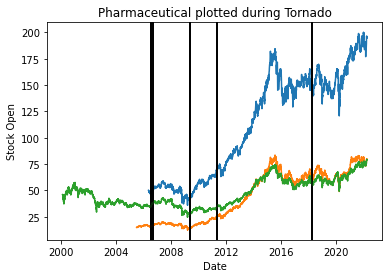

In [32]:
tornado.plot()

In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import random
import time
import sklearn as skl
import matplotlib.dates as mdates
import datetime as dt

class hurricane_dis:
    """ Disasters class.

    Attributes
    ----------
    date: industry affected
        
    natural_disaster: str
        type of disaster

    Methods
    -------
    info():
        Prints disaster info.

    check_etf:
        checks disaster impact on ETF

    """
    dates = None
    natural_disaster = None
    etf = None
    industry = None
    
    
    def __init__(self, industry_name, natural_disaster_type):
        self.industry_name = industry_name
        self.natural_disaster_type = natural_disaster_type
        
        """Read in ETF'S.

        Data from Yahoo Finance
        ----------
        list_etfs: Pathspace to data in list form
            
        data: assign each to proper ETF name
        
        natural_dis: Data from natural disasters masked to be different types

        """
        list_etfs = ['Pharma/IHE.csv', 'Pharma/PJP.csv', 'Pharma/PPH.csv', 
             'Real Estate/IYR.csv', 'Real Estate/SCHH.csv', 'Real Estate/VNQ.csv',
             'Energy/OILU.csv', 'Energy/GUSH.csv', 'Energy/VDE.csv',
             'Materials/IYM.csv', 'Materials/VAW.csv', 'Materials/XLB.csv', 'Materials/MXI.csv',
             'Entertainment/PBS.csv', 'Entertainment/PEJ.csv', 'Entertainment/VOX.csv',
             'Healthcare/IBB.csv', 'Healthcare/VHT.csv', 'Healthcare/XLV.csv',
             'Manufacturing/EXI (9-28-2006).csv', 'Manufacturing/VIS (9-30-2004).csv', 'Manufacturing/XLI (12-28-1998).csv',
             'Mining/PICK.csv', 'Mining/REMX.csv','Mining/XME.csv',
             'Tech/RYT.csv', 'Tech/VGT.csv', 'Tech/XSW.csv',
             'Agriculture/DBA.csv', 'Agriculture/RJA.csv', 'Agriculture/TAGS.csv',
             'Automotive/CARZ.csv', 'Automotive/DRIV.csv', 'Automotive/VCAR.csv',
             'Telecommunications/IYZ.csv', 'Telecommunications/NXTG.csv', 'Telecommunications/VOX.csv']
        
        data = []

        for file in list_etfs:
            df = pd.read_csv(file, delimiter = ',')
            data.append(df)
    
        IHE, PJP, PPH, IYR, SCHH, VNQ, OILU, GUSH, VDE, IYM, VAW, XLB, MXI, PBS, PEJ, VOX, IBB, VHT, XLV, EXI, VIS, XLI, PICK, REMX, XME, RYT, VGT, XSW, DBA, RJA, TAGS,CARZ, DRIV, VCAR, IYZ, NXTG, VOX = data

        self.pharma = [IHE, PJP, PPH]
        self.real_estate = [IYR, SCHH, VNQ]
        self.energy = [OILU, GUSH, VDE]
        self.materials = [IYM, VAW, XLB, MXI]
        self.entertainment = [PBS, PEJ, VOX]
        self.healthcare = [IBB, VHT, XLV]
        self.manufacturing = [EXI, VIS, XLI]
        self.mining = [PICK, REMX, XME]
        self.tech = [RYT, VGT, XSW]
        self.agriculture = [DBA, RJA, TAGS]
        self.automotive = [CARZ, DRIV, VCAR]
        self.telecommunications = [IYZ, NXTG, VOX]
        
        pharma = [IHE, PJP, PPH]
        real_estate = [IYR, SCHH, VNQ]
        energy = [OILU, GUSH, VDE]
        materials = [IYM, VAW, XLB, MXI]
        entertainment = [PBS, PEJ, VOX]
        healthcare = [IBB, VHT, XLV]
        manufacturing = [EXI, VIS, XLI]
        mining = [PICK, REMX, XME]
        tech = [RYT, VGT, XSW]
        agriculture = [DBA, RJA, TAGS]
        automotive = [CARZ, DRIV, VCAR]
        telecommunications = [IYZ, NXTG, VOX]
        
        natural_dis = pd.read_csv('Disaster List.csv')

        #self.tornado = natural_dis[natural_dis['Disaster Type']=='Tornado']
        #self.snowstorm = natural_dis[natural_dis['Disaster Type']=='Snowstorm']
        self.hurricane = natural_dis[natural_dis['Disaster Type']=='Hurricane']
    
    
    def data(self):

        if self.industry_name == 'Pharmaceutical':
            self.industry = self.pharma
            self.etf = ['IHE', 'PJP', 'PPH']
        elif self.industry_name == 'Real Estate':
            self.industry = self.real_estate
            self.etf = ['IYR', 'SCHH', 'VNQ']
        elif self.industry_name == 'Energy':
            self.industry = self.energy
            self.etf = ['OILU', 'GUSH', 'VDE']
        elif self.industry_name == 'Materials':
            self.industry = self.materials
            self.etf = ['IYM', 'VAW', 'XLB', 'MXI']
        elif self.industry_name == 'Entertainment':
            self.industry = self.entertainment
            self.etf = ['PBS', 'PEJ', 'VOX']
        elif self.industry_name == 'Healthcare':
            self.industry = self.healthcare
            self.etf = ['IBB', 'VHT', 'XLV']
        elif self.industry_name == 'Manufacturing':
            self.industry = self.manufacturing
            self.etf = ['EXI', 'VIS', 'XLI']
        elif self.industry_name == 'Mining':
            self.industry = self.mining
            self.etf = ['PICK', 'REMX', 'XME']
        elif self.industry_name == 'Tech':
            self.industry = self.tech
            self.etf = ['RYT', 'VGT', 'XSW']
        elif self.industry_name == 'Agriculture':
            self.industry = self.agriculture
            self.etf = ['DBA', 'RJA', 'TAGS']
        elif self.industry_name == 'Automotive':
            self.industry = self.automotive
            self.etf = ['CARZ', 'DRIV', 'VCAR']
        elif self.industry_name == 'Telecommunications':
            self.industry = self.telecommunications
            self.etf = ['IYZ', 'NXTG', 'VOX']
        if self.natural_disaster_type == 'Hurricane':
            self.natural_disaster = self.hurricane
            self.dates = self.natural_disaster['Start']
        return self.dates

        
    def plot(self):
        axv = []
        for dis in self.dates:
            axv.append([dt.datetime.strptime(d,'%Y-%m-%d').date() for d in self.dates.iloc[:]])
        
        axv0 = axv[0]
        
        for etf in self.industry:
            x = [dt.datetime.strptime(d,'%Y-%m-%d').date() for d in etf.iloc[:,0]]
            plt.plot(x, etf['Open'], label = self.etf)
            plt.xlabel('Date')
            plt.ylabel('Stock Open')
            plt.title(f"{self.industry_name} plotted during {self.natural_disaster_type}")
            plt.axvline(axv0[20], c = 'black')
            plt.axvline(axv0[5], c = 'black')
            plt.axvline(axv0[10], c = 'black')
            plt.axvline(axv0[4], c= 'black')
            plt.axvline(axv0[14], c='black')
                

In [47]:
hurricane = hurricane_dis('Pharmaceutical', 'Hurricane')
hurricane.data()

103    2004-08-11
104    2004-09-13
105    2005-08-23
106    2005-10-15
107    2005-09-18
108    2005-07-04
109    2005-07-11
110    2007-08-13
111    2008-09-01
112    2008-08-25
113    2010-09-14
114    2011-08-21
115    2012-10-22
116    2016-09-28
117    2017-08-17
118    2017-08-30
119    2017-09-16
120    2018-10-07
121    2018-08-31
122    2019-08-24
123    2020-08-20
124    2020-10-31
125    2020-10-24
126    2020-10-04
127    2021-08-26
Name: Start, dtype: object

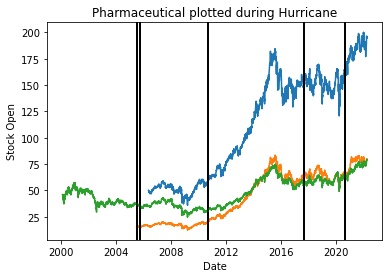

In [48]:
hurricane.plot()

In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import random
import time
import sklearn as skl
import matplotlib.dates as mdates
import datetime as dt

class snowstorm_dis:
    """ Disasters class.

    Attributes
    ----------
    date: industry affected
        
    natural_disaster: str
        type of disaster

    Methods
    -------
    info():
        Prints disaster info.

    check_etf:
        checks disaster impact on ETF

    """
    dates = None
    natural_disaster = None
    etf = None
    industry = None
    
    
    def __init__(self, industry_name, natural_disaster_type):
        self.industry_name = industry_name
        self.natural_disaster_type = natural_disaster_type
        
        """Read in ETF'S.

        Data from Yahoo Finance
        ----------
        list_etfs: Pathspace to data in list form
            
        data: assign each to proper ETF name
        
        natural_dis: Data from natural disasters masked to be different types

        """
        list_etfs = ['Pharma/IHE.csv', 'Pharma/PJP.csv', 'Pharma/PPH.csv', 
             'Real Estate/IYR.csv', 'Real Estate/SCHH.csv', 'Real Estate/VNQ.csv',
             'Energy/OILU.csv', 'Energy/GUSH.csv', 'Energy/VDE.csv',
             'Materials/IYM.csv', 'Materials/VAW.csv', 'Materials/XLB.csv', 'Materials/MXI.csv',
             'Entertainment/PBS.csv', 'Entertainment/PEJ.csv', 'Entertainment/VOX.csv',
             'Healthcare/IBB.csv', 'Healthcare/VHT.csv', 'Healthcare/XLV.csv',
             'Manufacturing/EXI (9-28-2006).csv', 'Manufacturing/VIS (9-30-2004).csv', 'Manufacturing/XLI (12-28-1998).csv',
             'Mining/PICK.csv', 'Mining/REMX.csv','Mining/XME.csv',
             'Tech/RYT.csv', 'Tech/VGT.csv', 'Tech/XSW.csv',
             'Agriculture/DBA.csv', 'Agriculture/RJA.csv', 'Agriculture/TAGS.csv',
             'Automotive/CARZ.csv', 'Automotive/DRIV.csv', 'Automotive/VCAR.csv',
             'Telecommunications/IYZ.csv', 'Telecommunications/NXTG.csv', 'Telecommunications/VOX.csv']
        
        data = []

        for file in list_etfs:
            df = pd.read_csv(file, delimiter = ',')
            data.append(df)
    
        IHE, PJP, PPH, IYR, SCHH, VNQ, OILU, GUSH, VDE, IYM, VAW, XLB, MXI, PBS, PEJ, VOX, IBB, VHT, XLV, EXI, VIS, XLI, PICK, REMX, XME, RYT, VGT, XSW, DBA, RJA, TAGS,CARZ, DRIV, VCAR, IYZ, NXTG, VOX = data

        self.pharma = [IHE, PJP, PPH]
        self.real_estate = [IYR, SCHH, VNQ]
        self.energy = [OILU, GUSH, VDE]
        self.materials = [IYM, VAW, XLB, MXI]
        self.entertainment = [PBS, PEJ, VOX]
        self.healthcare = [IBB, VHT, XLV]
        self.manufacturing = [EXI, VIS, XLI]
        self.mining = [PICK, REMX, XME]
        self.tech = [RYT, VGT, XSW]
        self.agriculture = [DBA, RJA, TAGS]
        self.automotive = [CARZ, DRIV, VCAR]
        self.telecommunications = [IYZ, NXTG, VOX]
        
        pharma = [IHE, PJP, PPH]
        real_estate = [IYR, SCHH, VNQ]
        energy = [OILU, GUSH, VDE]
        materials = [IYM, VAW, XLB, MXI]
        entertainment = [PBS, PEJ, VOX]
        healthcare = [IBB, VHT, XLV]
        manufacturing = [EXI, VIS, XLI]
        mining = [PICK, REMX, XME]
        tech = [RYT, VGT, XSW]
        agriculture = [DBA, RJA, TAGS]
        automotive = [CARZ, DRIV, VCAR]
        telecommunications = [IYZ, NXTG, VOX]
        
        natural_dis = pd.read_csv('Disaster List.csv')

        #self.tornado = natural_dis[natural_dis['Disaster Type']=='Tornado']
        #self.snowstorm = natural_dis[natural_dis['Disaster Type']=='Snowstorm']
        self.hurricane = natural_dis[natural_dis['Disaster Type']=='Hurricane']
    
    
    def data(self):

        if self.industry_name == 'Pharmaceutical':
            self.industry = self.pharma
            self.etf = ['IHE', 'PJP', 'PPH']
        elif self.industry_name == 'Real Estate':
            self.industry = self.real_estate
            self.etf = ['IYR', 'SCHH', 'VNQ']
        elif self.industry_name == 'Energy':
            self.industry = self.energy
            self.etf = ['OILU', 'GUSH', 'VDE']
        elif self.industry_name == 'Materials':
            self.industry = self.materials
            self.etf = ['IYM', 'VAW', 'XLB', 'MXI']
        elif self.industry_name == 'Entertainment':
            self.industry = self.entertainment
            self.etf = ['PBS', 'PEJ', 'VOX']
        elif self.industry_name == 'Healthcare':
            self.industry = self.healthcare
            self.etf = ['IBB', 'VHT', 'XLV']
        elif self.industry_name == 'Manufacturing':
            self.industry = self.manufacturing
            self.etf = ['EXI', 'VIS', 'XLI']
        elif self.industry_name == 'Mining':
            self.industry = self.mining
            self.etf = ['PICK', 'REMX', 'XME']
        elif self.industry_name == 'Tech':
            self.industry = self.tech
            self.etf = ['RYT', 'VGT', 'XSW']
        elif self.industry_name == 'Agriculture':
            self.industry = self.agriculture
            self.etf = ['DBA', 'RJA', 'TAGS']
        elif self.industry_name == 'Automotive':
            self.industry = self.automotive
            self.etf = ['CARZ', 'DRIV', 'VCAR']
        elif self.industry_name == 'Telecommunications':
            self.industry = self.telecommunications
            self.etf = ['IYZ', 'NXTG', 'VOX']
        if self.natural_disaster_type == 'Snowstorm':
            self.natural_disaster = self.hurricane
            self.dates = self.natural_disaster['Start']
        return self.dates

        
    def plot(self):
        axv = []
        for dis in self.dates:
            axv.append([dt.datetime.strptime(d,'%Y-%m-%d').date() for d in self.dates.iloc[:]])
        
        axv0 = axv[0]
        
        for etf in self.industry:
            x = [dt.datetime.strptime(d,'%Y-%m-%d').date() for d in etf.iloc[:,0]]
            plt.plot(x, etf['Open'], label = self.etf)
            plt.xlabel('Date')
            plt.ylabel('Stock Open')
            plt.title(f"{self.industry_name} plotted during {self.natural_disaster_type}")
            plt.axvline(axv0[20], c = 'black')
            plt.axvline(axv0[5], c = 'black')
            plt.axvline(axv0[10], c = 'black')
            plt.axvline(axv0[4], c= 'black')
            plt.axvline(axv0[14], c='black')
                

In [57]:
snowstorm = snowstorm_dis('Pharmaceutical', 'Snowstorm')
snowstorm.data()

103    2004-08-11
104    2004-09-13
105    2005-08-23
106    2005-10-15
107    2005-09-18
108    2005-07-04
109    2005-07-11
110    2007-08-13
111    2008-09-01
112    2008-08-25
113    2010-09-14
114    2011-08-21
115    2012-10-22
116    2016-09-28
117    2017-08-17
118    2017-08-30
119    2017-09-16
120    2018-10-07
121    2018-08-31
122    2019-08-24
123    2020-08-20
124    2020-10-31
125    2020-10-24
126    2020-10-04
127    2021-08-26
Name: Start, dtype: object

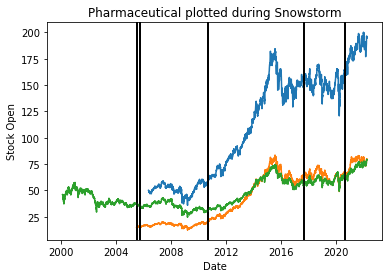

In [58]:
snowstorm.plot()